#Tensorflow

In [2]:
#TensorFLow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers , models , datasets
import matplotlib.pyplot as plt

In [3]:
#Dataset
(X_train , y_train) , (X_test , y_test) = datasets.cifar10.load_data()

#Normalize pixels values to be between 0 and 1
X_train , X_test = X_train/255 , X_test/255

170498071/170498071 [==============================] - 13s 0us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
classes_names =('Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck')

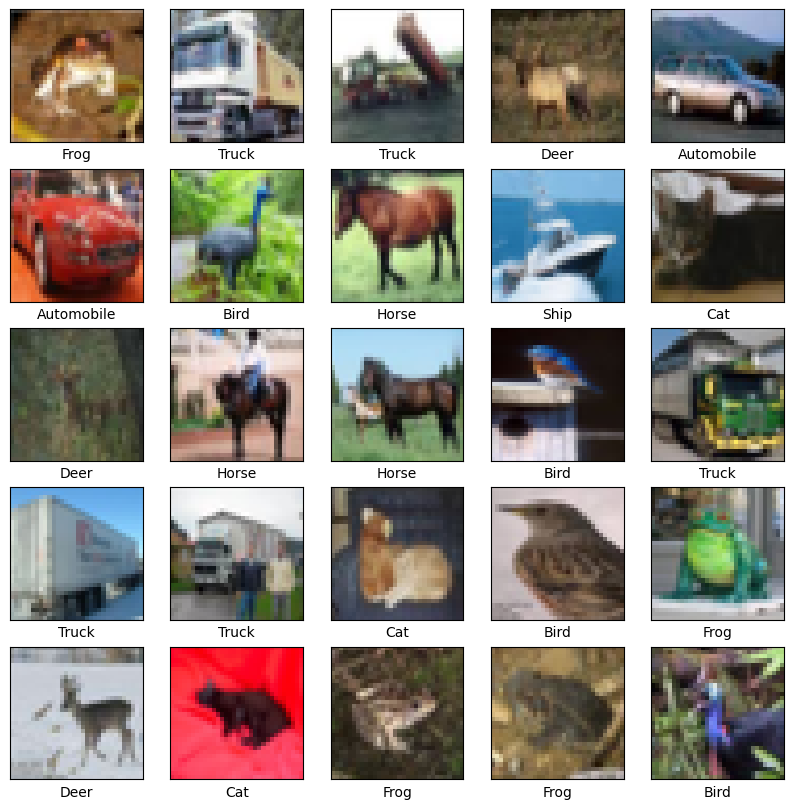

In [6]:
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5 , i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i])
  plt.xlabel(classes_names[y_train[i][0]])

plt.show()

In [7]:
#Model
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3) , activation = 'relu' , input_shape = (32,32,3)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(3,3) , activation = 'relu' ))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(3,3) , activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64 , activation = 'relu'))
model.add(layers.Dense(10))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [9]:
#Compile
model.compile(optimizer = 'adam' , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [10]:
# Training
history = model.fit(X_train , y_train , epochs = 10 , validation_split=0.2 )

Epoch 1/10
1250/1250 [==============================] - 11s 6ms/step - loss: 1.5873 - accuracy: 0.4193 - val_loss: 1.3213 - val_accuracy: 0.5331
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2123 - accuracy: 0.5673 - val_loss: 1.1639 - val_accuracy: 0.5951
Epoch 3/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.0595 - accuracy: 0.6263 - val_loss: 1.0446 - val_accuracy: 0.6312
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9602 - accuracy: 0.6635 - val_loss: 0.9687 - val_accuracy: 0.6663
Epoch 5/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8834 - accuracy: 0.6895 - val_loss: 0.9590 - val_accuracy: 0.6698
Epoch 6/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.8250 - accuracy: 0.7130 - val_loss: 0.9059 - val_accuracy: 0.6901
Epoch 7/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.7735 - accuracy: 0.7282 - val_loss: 0.8975 - val_accuracy

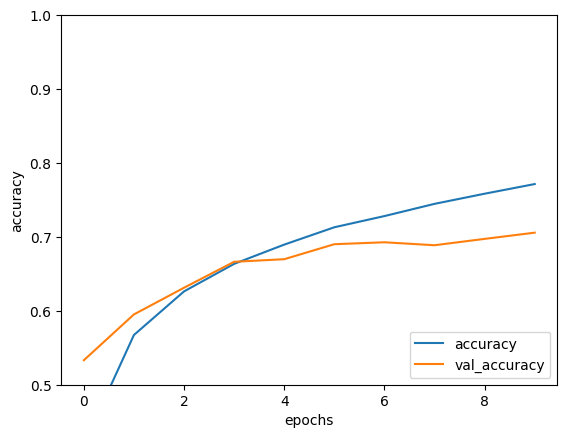

In [11]:
# plot history
plt.plot(history.history['accuracy'] , label = 'accuracy')
plt.plot(history.history['val_accuracy'] , label = 'val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim([0.5 ,1])
plt.legend(loc = 'lower right')

In [12]:
# Evaluate
test_loss , test_acc = model.evaluate(X_test , y_test , verbose = 1)
print(f'Loss:{test_loss} , accuracy:{test_acc}')

313/313 [==============================] - 1s 4ms/step - loss: 0.9270 - accuracy: 0.6967
Loss:0.9270111322402954 , accuracy:0.6966999769210815


#Pytorch

In [13]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [14]:
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')
print(device)

cuda


In [15]:
#Hyperparameter
batch_size = 32

In [18]:
#Dataset and DataLoader
transform = transforms.Compose([transforms.ToTensor() , transforms.Normalize((0.5,0.5,0.5) , (0.5,0.5,0.5))])

Trainset = torchvision.datasets.CIFAR10(root = './data' , train = True , download = True , transform = transform)

trainloader = torch.utils.data.DataLoader(Trainset , batch_size = batch_size , shuffle = True , num_workers = 2)

Testset = torchvision.datasets.CIFAR10(root = './data' , train = False , download = True ,transform = transform )

testloader = torch.utils.data.DataLoader(Testset , batch_size = batch_size , shuffle = False , num_workers = 2)

Files already downloaded and verified
Files already downloaded and verified


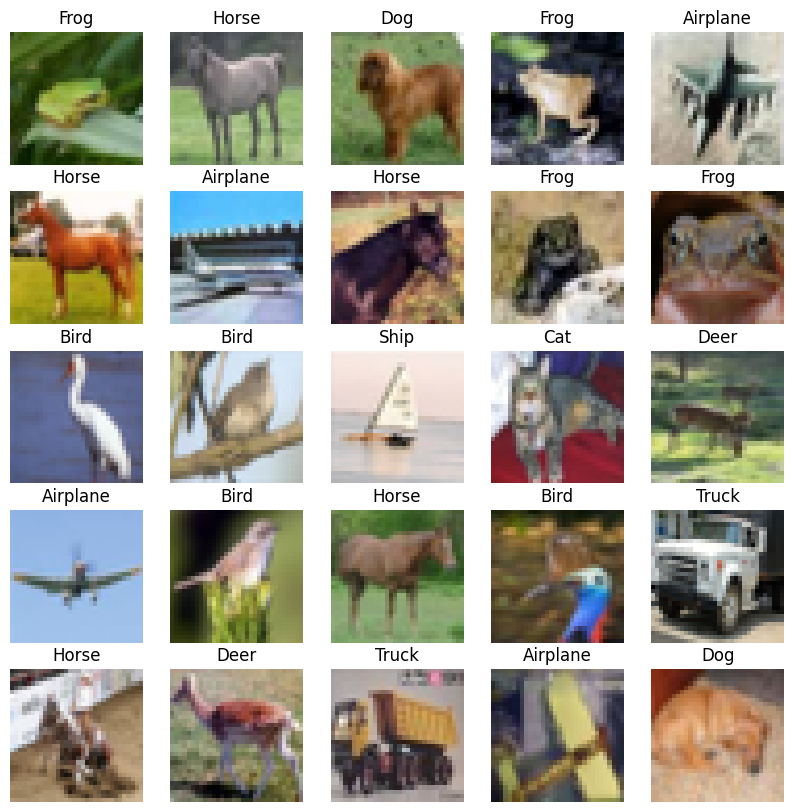

In [28]:
def imshow(imgs, labels, classes_names):
    plt.figure(figsize=(10, 10))
    for i in range(len(imgs)):
        img = imgs[i] / 2 + 0.5
        npimg = img.numpy()
        npimg = np.transpose(npimg, (1, 2, 0))
        plt.subplot(5, 5, i + 1)
        plt.imshow(npimg)
        plt.title(classes_names[labels[i]])
        plt.axis('off')

dataiter = iter(trainloader)
images, labels = next(dataiter)

classes_names = ('Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck')
imshow(images[:25], labels[:25], classes_names)
plt.show()

In [37]:
#Model
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()
    self.conv1 = nn.Conv2d(3,32,3)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(32,64,3)
    self.conv3 = nn.Conv2d(64,64,3)
    self.fc1 = nn.Linear(64*4*4 , 64)
    self.fc2 = nn.Linear(64,10)

  def forward(self , x):
      x = F.relu(self.conv1(x))
      x = self.pool(x)
      x = F.relu(self.conv2(x))
      x = self.pool(x)
      x = F.relu(self.conv3(x))
      x = torch.flatten(x,1)
      x = F.relu(self.fc1(x))
      x = self.fc2(x)
      return x

model = ConvNet().to(device)

In [38]:
#loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters() , lr = 0.001)

In [39]:
#Training
steps_per_epoch = len(trainloader)
for epoch in range(10):
  running_loss = 0.0
  for (inputs , labels) in trainloader:
    inputs = inputs.to(device)
    labels = labels.to(device)

    #forward & loss
    outputs = model(inputs)
    loss = criterion(outputs , labels)

    #backward & optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    running_loss+=loss.item()


  print(f'[{epoch +1}] loss:{running_loss/steps_per_epoch: .3f}')
print('Finshed Training')

[1] loss:  1.459
[2] loss:  1.094
[3] loss:  0.941
[4] loss:  0.833
[5] loss:  0.757
[6] loss:  0.694
[7] loss:  0.635
[8] loss:  0.586
[9] loss:  0.543
[10] loss:  0.504
Finshed Training


In [42]:
# Evalution
n_correct = 0
n_total = 0
model.eval()
with torch.no_grad():
    for (images , labels) in testloader:
      images = images.to(device)
      labels = labels.to(device)
      outputs = model(images)

    # take class with highest value as prediction
    _,predicted = torch.max(outputs.data , 1)
    n_total+=labels.size(0)
    n_correct+=(predicted == labels).sum().item()

print(f'Accuracy on test set :{n_correct/n_total:.3f}')

Accuracy on test set :0.688
